In [1]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.2/107.7 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!pip install roboflow==1.1.48 --quiet
from roboflow import Roboflow
rf = Roboflow(api_key="o1x9fBRCsfEATYLz5Op3")
project = rf.workspace("vitvellore-rtjtf").project("pothole-detection-new-syj2l")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pothole-detection-new-1 in yolov8:: 100%|██████████| 1078/1078 [00:00<00:00, 4963.06it/s]


In [6]:
!ls pothole-detection-new-1


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [7]:
!yolo task=detect mode=train model=yolov8s.pt data=pothole-detection-new-1/data.yaml epochs=25 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 250MB/s]
New https://pypi.org/project/ultralytics/8.3.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=pothole-detection-new-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina

In [10]:

model = YOLO("yolov8s.pt")
model.train(
    data=pothole-detection-new-1/data_yaml,
    epochs=15,
    imgsz=640,
    batch=16,
    workers=4,
    project="pothole_detection",
    name="yolo_model",
    save=True,
    cache=True,
    pretrained=True
)


NameError: name 'pothole' is not defined

In [14]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/pothole-detection-new-1/data.yaml epochs=15 imgsz=640


New https://pypi.org/project/ultralytics/8.3.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/pothole-detection-new-1/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show

In [15]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/pothole-detection-new-1/data.yaml

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 804, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 145, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 285, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 906, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
     

In [16]:
!ls runs/detect/train/weights/


In [17]:
!ls runs/detect/train/

args.yaml  weights


In [18]:
!find /content/ -name "best.pt"


/content/runs/detect/train2/weights/best.pt


In [19]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/pothole-detection-new-1/data.yaml

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/pothole-detection-new-1/valid/labels.cache... 106 images, 0 backgrounds, 0 corrupt: 100% 106/106 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [01:43<00:00, 14.79s/it]
                   all        106        514      0.803      0.775      0.844      0.633
Speed: 14.8ms preprocess, 947.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [20]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/pothole-detection-new-1/data.yaml


Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/pothole-detection-new-1/valid/labels.cache... 106 images, 0 backgrounds, 0 corrupt: 100% 106/106 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [01:40<00:00, 14.35s/it]
                   all        106        514      0.803      0.775      0.844      0.633
Speed: 4.5ms preprocess, 929.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


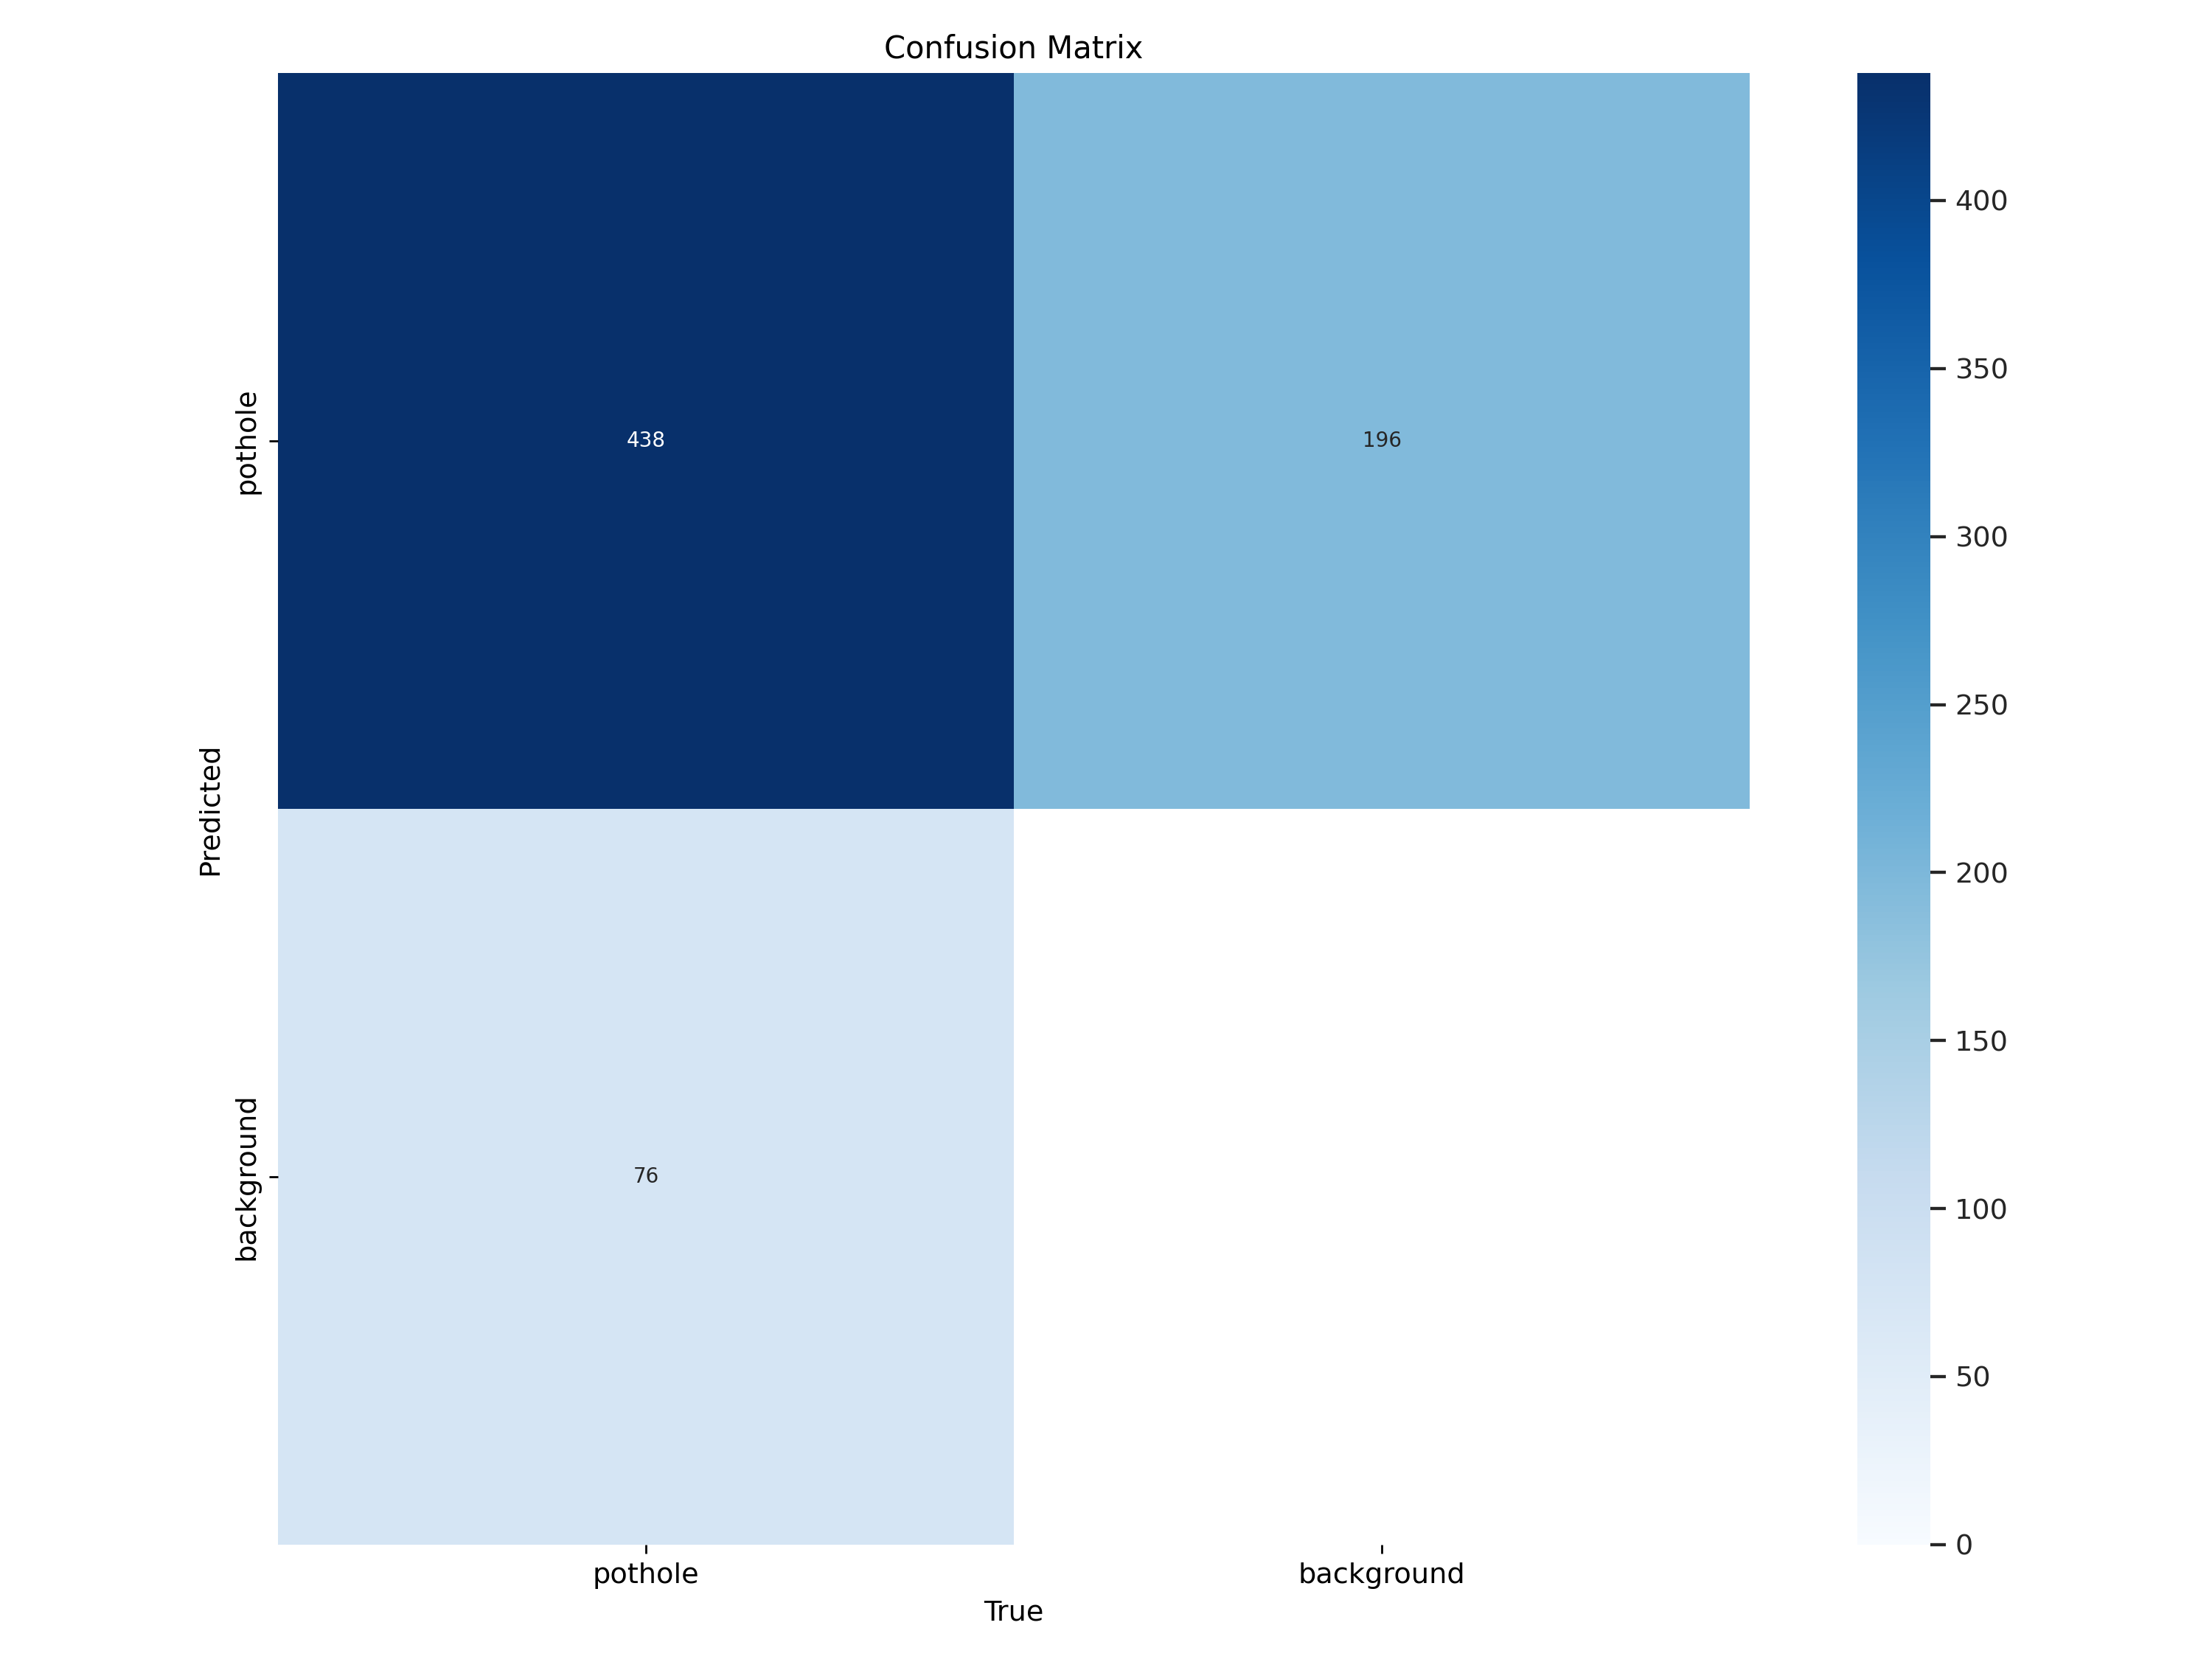

In [23]:
from IPython.display import Image, display

# Display the confusion matrix image
display(Image(filename="runs/detect/val/confusion_matrix.png"))
